<a href="https://colab.research.google.com/github/gkakani1/GOUTHAM-DATA606/blob/main/Code/EDA/final_Datasets_EDA/final_Combined_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Final Dataset

## Mounting google drive files 

In [590]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing required modules and functions 

In [591]:

import glob
import pandas as pd
import re 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [592]:
# Reading required datasets 
df_crops = pd.read_excel('/content/drive/MyDrive/Capstone/Datasets/Final_Datasets/Final_Crops_Dataset.xlsx')
df_weather = pd.read_excel('/content/drive/MyDrive/Capstone/Datasets/Final_Datasets/Final_Wether_Dataset.xlsx')

In [593]:
df_crops.head(10) #Top 10 rows of crops dataframe 

,S.No.,Center_Name,Price_in_January,Price_in_February,Price_in_March,Price_in_April,Price_in_May,Price_in_June,Price_in_July,Price_in_August,Price_in_September,Price_in_October,Price_in_November,Price_in_December,Crop,Year
0,1,Chhattisgarh,1126.888889,1126.888889,1307.000000,1119.0,751.0,1729.0,1164.0,1173.0,1139.0,960.0,800.0,1126.888889,BITTER GOURD,2011
1,2,Andhra Pradesh,1031.500000,1031.500000,1031.500000,1031.5,1179.0,640.0,942.0,1083.0,1269.0,1076.0,1031.5,1031.500000,BITTER GOURD,2011
2,3,Rajasthan,1410.000000,1073.000000,965.000000,932.0,1546.0,1660.0,1589.0,1542.0,1659.0,1716.0,1563.0,1539.000000,BITTER GOURD,2011
3,4,Jhammu & Kashmir,1086.000000,1086.000000,1086.000000,1370.0,1018.0,750.0,1231.0,1061.0,1086.0,1086.0,1086.0,1086.000000,BITTER GOURD,2011
4,5,Maharashtra,1673.800000,1673.800000,2546.000000,1907.0,1298.0,1462.0,2262.0,1576.0,1448.0,1035.0,1608.0,1596.000000,BITTER GOURD,2011
5,6,Jhammu & Kashmir,2540.000000,2339.000000,1630.000000,847.0,795.0,1498.0,1723.0,1648.0,2105.0,1926.0,1635.0,1480.000000,BITTER GOURD,2011
6,7,Chhattisgarh,1219.500000,1219.500000,1219.500000,1219.5,1488.0,869.0,996.0,1148.0,1359.0,1457.0,1219.5,1219.500000,BITTER GOURD,2011
7,8,Andhra Pradesh,1908.000000,1387.000000,1222.000000,1013.0,1276.0,1248.0,1546.0,1447.0,1486.0,1500.0,1378.0,1420.000000,BITTER GOURD,2011
8,9,Gujarat,1391.111111,1391.111111,1391.111111,2632.0,719.0,828.0,899.0,810.0,1306.0,1242.0,1746.0,2338.000000,BITTER GOURD,2011
9,10,Madhya Pradesh,2342.000000,2358.000000,2321.000000,2027.0,914.0,601.0,883.0,923.0,1346.0,1162.0,1386.0,1598.000000,BITTER GOURD,2011


In [594]:
df_weather.head(10) # Top 10 rows of weather dataframe 

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,STATE
0,QV2M,2011,4.82,6.04,5.86,6.04,10.25,15.01,21.55,21.42,20.14,13.55,9.77,5.92,11.72,Uttar Pradesh
1,QV2M,2012,6.10,5.25,4.88,6.90,5.62,9.64,20.32,21.06,19.35,12.94,8.30,5.62,10.50,Uttar Pradesh
2,QV2M,2013,4.70,7.08,6.77,6.96,6.23,17.58,21.73,21.06,19.53,15.56,8.54,6.47,11.90,Uttar Pradesh
3,QV2M,2014,6.10,6.71,6.71,5.74,8.00,11.72,19.41,20.02,17.40,11.90,6.04,4.33,10.38,Uttar Pradesh
4,QV2M,2015,5.19,5.92,7.93,9.58,7.51,12.15,19.65,20.14,15.38,9.28,6.53,3.91,10.31,Uttar Pradesh
5,QV2M,2016,3.54,3.66,5.31,4.76,10.25,15.75,21.55,21.42,19.90,12.70,7.26,5.31,10.99,Uttar Pradesh
6,QV2M,2017,5.13,4.94,5.07,5.49,9.83,13.85,21.55,21.55,19.65,13.49,8.24,5.55,11.23,Uttar Pradesh
7,QV2M,2018,3.85,5.00,4.33,7.87,9.09,14.83,20.87,21.85,19.59,13.24,8.79,5.31,11.23,Uttar Pradesh
8,QV2M,2019,5.07,6.29,6.41,7.14,6.65,13.18,21.55,21.73,20.32,14.95,10.80,7.08,11.78,Uttar Pradesh
9,QV2M,2020,6.96,6.71,9.16,8.85,10.38,17.40,21.55,21.55,19.17,11.66,6.29,4.70,12.02,Uttar Pradesh


## Working on crops dataset

In [595]:
df_crops.head(10)

,S.No.,Center_Name,Price_in_January,Price_in_February,Price_in_March,Price_in_April,Price_in_May,Price_in_June,Price_in_July,Price_in_August,Price_in_September,Price_in_October,Price_in_November,Price_in_December,Crop,Year
0,1,Chhattisgarh,1126.888889,1126.888889,1307.000000,1119.0,751.0,1729.0,1164.0,1173.0,1139.0,960.0,800.0,1126.888889,BITTER GOURD,2011
1,2,Andhra Pradesh,1031.500000,1031.500000,1031.500000,1031.5,1179.0,640.0,942.0,1083.0,1269.0,1076.0,1031.5,1031.500000,BITTER GOURD,2011
2,3,Rajasthan,1410.000000,1073.000000,965.000000,932.0,1546.0,1660.0,1589.0,1542.0,1659.0,1716.0,1563.0,1539.000000,BITTER GOURD,2011
3,4,Jhammu & Kashmir,1086.000000,1086.000000,1086.000000,1370.0,1018.0,750.0,1231.0,1061.0,1086.0,1086.0,1086.0,1086.000000,BITTER GOURD,2011
4,5,Maharashtra,1673.800000,1673.800000,2546.000000,1907.0,1298.0,1462.0,2262.0,1576.0,1448.0,1035.0,1608.0,1596.000000,BITTER GOURD,2011
5,6,Jhammu & Kashmir,2540.000000,2339.000000,1630.000000,847.0,795.0,1498.0,1723.0,1648.0,2105.0,1926.0,1635.0,1480.000000,BITTER GOURD,2011
6,7,Chhattisgarh,1219.500000,1219.500000,1219.500000,1219.5,1488.0,869.0,996.0,1148.0,1359.0,1457.0,1219.5,1219.500000,BITTER GOURD,2011
7,8,Andhra Pradesh,1908.000000,1387.000000,1222.000000,1013.0,1276.0,1248.0,1546.0,1447.0,1486.0,1500.0,1378.0,1420.000000,BITTER GOURD,2011
8,9,Gujarat,1391.111111,1391.111111,1391.111111,2632.0,719.0,828.0,899.0,810.0,1306.0,1242.0,1746.0,2338.000000,BITTER GOURD,2011
9,10,Madhya Pradesh,2342.000000,2358.000000,2321.000000,2027.0,914.0,601.0,883.0,923.0,1346.0,1162.0,1386.0,1598.000000,BITTER GOURD,2011


In [596]:
df_crops.info() # Using info functon to print concise of crops dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No.               2701 non-null   int64  
 1   Center_Name         2701 non-null   object 
 2   Price_in_January    2701 non-null   float64
 3   Price_in_February   2701 non-null   float64
 4   Price_in_March      2701 non-null   float64
 5   Price_in_April      2701 non-null   float64
 6   Price_in_May        2701 non-null   float64
 7   Price_in_June       2701 non-null   float64
 8   Price_in_July       2701 non-null   float64
 9   Price_in_August     2701 non-null   float64
 10  Price_in_September  2701 non-null   float64
 11  Price_in_October    2701 non-null   float64
 12  Price_in_November   2701 non-null   float64
 13  Price_in_December   2701 non-null   float64
 14  Crop                2701 non-null   object 
 15  Year                2701 non-null   int64  
dtypes: flo

In [597]:
df_crops_final = pd.DataFrame() # Creating an empty dataframe 

In [598]:
# In the below code I am converting the above dataframe by adding Month column and Price column and inserting a months price in respective cell
list_crops_header = df_crops.columns.values.tolist()[2:-2] # Taking required header values 
for i in list_crops_header:
  df_crops_final1 = df_crops[["Center_Name","Crop",	"Year"]] # Coping required column values from above dataframe
  df_crops_final1["Month"] =  i[9:] # Adding values to Month column 
  df_crops_final1["Price"] = df_crops[i] # Copying price values from df_crops column and adding it to respective df_crops_final1 cells
  df_crops_final = df_crops_final.append(df_crops_final1) # Appending to df_crops_final datafram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [599]:
df_crops_final = df_crops_final.rename(columns={'Center_Name': 'State'}) # Changing column name from "Center_Name" to "State"

In [600]:
df_crops_final # Final dataframe

,State,Crop,Year,Month,Price
0,Chhattisgarh,BITTER GOURD,2011,January,1126.888889
1,Andhra Pradesh,BITTER GOURD,2011,January,1031.500000
2,Rajasthan,BITTER GOURD,2011,January,1410.000000
3,Jhammu & Kashmir,BITTER GOURD,2011,January,1086.000000
4,Maharashtra,BITTER GOURD,2011,January,1673.800000
...,...,...,...,...,...
2696,Maharashtra,TOMATO LOCAL,2012,December,825.000000
2697,New Delhi,TOMATO LOCAL,2012,December,450.000000
2698,Punjab,TOMATO LOCAL,2012,December,567.000000
2699,Maharashtra,TOMATO LOCAL,2012,December,675.000000


In [601]:
df_crops_final[df_crops_final.Month=="January"].Year.unique()# Checking unique year values 

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2019, 2021,
       2022])

In [602]:
len(df_crops_final) == len(df_crops)* (12) # Checking wether the dataframe df_crops_final consists of espected number of rows

True

In [603]:
list_Months = df_crops_final.Month.unique().tolist() # Taking month values into list 

## Working on weather dataset 

In [604]:
df_weather.head(25) # Top 25 rows in weather dataset

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,STATE
0,QV2M,2011,4.82,6.04,5.86,6.04,10.25,15.01,21.55,21.42,20.14,13.55,9.77,5.92,11.72,Uttar Pradesh
1,QV2M,2012,6.10,5.25,4.88,6.90,5.62,9.64,20.32,21.06,19.35,12.94,8.30,5.62,10.50,Uttar Pradesh
2,QV2M,2013,4.70,7.08,6.77,6.96,6.23,17.58,21.73,21.06,19.53,15.56,8.54,6.47,11.90,Uttar Pradesh
3,QV2M,2014,6.10,6.71,6.71,5.74,8.00,11.72,19.41,20.02,17.40,11.90,6.04,4.33,10.38,Uttar Pradesh
4,QV2M,2015,5.19,5.92,7.93,9.58,7.51,12.15,19.65,20.14,15.38,9.28,6.53,3.91,10.31,Uttar Pradesh
5,QV2M,2016,3.54,3.66,5.31,4.76,10.25,15.75,21.55,21.42,19.90,12.70,7.26,5.31,10.99,Uttar Pradesh
6,QV2M,2017,5.13,4.94,5.07,5.49,9.83,13.85,21.55,21.55,19.65,13.49,8.24,5.55,11.23,Uttar Pradesh
7,QV2M,2018,3.85,5.00,4.33,7.87,9.09,14.83,20.87,21.85,19.59,13.24,8.79,5.31,11.23,Uttar Pradesh
8,QV2M,2019,5.07,6.29,6.41,7.14,6.65,13.18,21.55,21.73,20.32,14.95,10.80,7.08,11.78,Uttar Pradesh
9,QV2M,2020,6.96,6.71,9.16,8.85,10.38,17.40,21.55,21.55,19.17,11.66,6.29,4.70,12.02,Uttar Pradesh


In [605]:
df_weather.columns = ["Parameter","Year"]+list_Months+["Ann","State"] # Modifying the header values with respect to crops dataframe 

In [606]:
df_weather.head(10) # New modified dataframe 

,Parameter,Year,January,February,March,April,May,June,July,August,September,October,November,December,Ann,State
0,QV2M,2011,4.82,6.04,5.86,6.04,10.25,15.01,21.55,21.42,20.14,13.55,9.77,5.92,11.72,Uttar Pradesh
1,QV2M,2012,6.10,5.25,4.88,6.90,5.62,9.64,20.32,21.06,19.35,12.94,8.30,5.62,10.50,Uttar Pradesh
2,QV2M,2013,4.70,7.08,6.77,6.96,6.23,17.58,21.73,21.06,19.53,15.56,8.54,6.47,11.90,Uttar Pradesh
3,QV2M,2014,6.10,6.71,6.71,5.74,8.00,11.72,19.41,20.02,17.40,11.90,6.04,4.33,10.38,Uttar Pradesh
4,QV2M,2015,5.19,5.92,7.93,9.58,7.51,12.15,19.65,20.14,15.38,9.28,6.53,3.91,10.31,Uttar Pradesh
5,QV2M,2016,3.54,3.66,5.31,4.76,10.25,15.75,21.55,21.42,19.90,12.70,7.26,5.31,10.99,Uttar Pradesh
6,QV2M,2017,5.13,4.94,5.07,5.49,9.83,13.85,21.55,21.55,19.65,13.49,8.24,5.55,11.23,Uttar Pradesh
7,QV2M,2018,3.85,5.00,4.33,7.87,9.09,14.83,20.87,21.85,19.59,13.24,8.79,5.31,11.23,Uttar Pradesh
8,QV2M,2019,5.07,6.29,6.41,7.14,6.65,13.18,21.55,21.73,20.32,14.95,10.80,7.08,11.78,Uttar Pradesh
9,QV2M,2020,6.96,6.71,9.16,8.85,10.38,17.40,21.55,21.55,19.17,11.66,6.29,4.70,12.02,Uttar Pradesh


In [607]:
list_parameters = df_weather.Parameter.unique().tolist() # Taking unique parameters values into list
list_Year = df_weather.Year.unique().tolist() # Taking unique Years values into list
list_State = df_weather.State.unique().tolist() # Taking unique State column values into list

In [608]:
list_parameters, "No:of Parameters = {}" .format(len(list_parameters)) # Checking the list of parameters

(['QV2M',
  'T2MDEW',
  'GWETTOP',
  'T2M_MAX',
  'T2M_MIN',
  'GWETPROF',
  'GWETROOT',
  'WS2M_MAX',
  'WS2M_MIN',
  'CLOUD_AMT',
  'PRECTOTCORR',
  'ALLSKY_SFC_PAR_TOT'],
 'No:of Parameters = 12')

In [609]:
list_Year, "No:of Years = {}" .format(len(list_Year)) # Checking the list of year values

([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'No:of Years = 10')

In [610]:
list_State, "No:of States = {}" .format(len(list_State)) # Checking the list of state values 

(['Uttar Pradesh',
  'Uttarakhand',
  'West Bengal',
  'Tripura',
  'Telangana',
  'Tamil Nadu',
  'Sikkim',
  'Rajasthan',
  'Punjab',
  'Mizoram',
  'Odisha',
  'Meghalaya',
  'Nagaland',
  'Manipur',
  'Maharashtra',
  'Madhya Pradesh',
  'Kerala',
  'Karnataka',
  'Haryana',
  'Himachal Pradesh',
  'Jhammu & Kashmir',
  'Gujarat',
  'Jharkhand',
  'Goa',
  'Chhattisgarh',
  'Bihar',
  'Assam',
  'Arunachal Pradesh',
  'Andhra Pradesh'],
 'No:of States = 29')

In [611]:
# Checking if each state consists of 10 years data and each month in a year has all the parameter data

In [612]:
year_Value = 0
parameter_Value = 0
for i in list_State: # for each State
  df_samp1 = df_weather[df_weather.State == i] # Dataframe with a unique state value
  if df_samp1.Year.unique().tolist() == list_Year: # If it contains all the years 
    year_Value =year_Value+1 # Increament year_Value by 1

    if df_samp1.Parameter.unique().tolist() == list_parameters: # If dataframe contains all the unique parameters 
      parameter_Value = parameter_Value+1 # Increament parameter_Value by 1


if (((year_Value) == len(list_State)) and ((parameter_Value) ==len(list_State))): # If All the individual dataframe contains year values from 2011 to 2020 and all 29 states print True
  print (True)



True


In [613]:
df_weather.head(20) # Viewing top 20 rows 

,Parameter,Year,January,February,March,April,May,June,July,August,September,October,November,December,Ann,State
0,QV2M,2011,4.82,6.04,5.86,6.04,10.25,15.01,21.55,21.42,20.14,13.55,9.77,5.92,11.72,Uttar Pradesh
1,QV2M,2012,6.10,5.25,4.88,6.90,5.62,9.64,20.32,21.06,19.35,12.94,8.30,5.62,10.50,Uttar Pradesh
2,QV2M,2013,4.70,7.08,6.77,6.96,6.23,17.58,21.73,21.06,19.53,15.56,8.54,6.47,11.90,Uttar Pradesh
3,QV2M,2014,6.10,6.71,6.71,5.74,8.00,11.72,19.41,20.02,17.40,11.90,6.04,4.33,10.38,Uttar Pradesh
4,QV2M,2015,5.19,5.92,7.93,9.58,7.51,12.15,19.65,20.14,15.38,9.28,6.53,3.91,10.31,Uttar Pradesh
5,QV2M,2016,3.54,3.66,5.31,4.76,10.25,15.75,21.55,21.42,19.90,12.70,7.26,5.31,10.99,Uttar Pradesh
6,QV2M,2017,5.13,4.94,5.07,5.49,9.83,13.85,21.55,21.55,19.65,13.49,8.24,5.55,11.23,Uttar Pradesh
7,QV2M,2018,3.85,5.00,4.33,7.87,9.09,14.83,20.87,21.85,19.59,13.24,8.79,5.31,11.23,Uttar Pradesh
8,QV2M,2019,5.07,6.29,6.41,7.14,6.65,13.18,21.55,21.73,20.32,14.95,10.80,7.08,11.78,Uttar Pradesh
9,QV2M,2020,6.96,6.71,9.16,8.85,10.38,17.40,21.55,21.55,19.17,11.66,6.29,4.70,12.02,Uttar Pradesh


In [614]:
df_weather_final = pd.DataFrame(pd.np.empty((0, 15)))     # Creading a empty dataframe with 15 columns 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [615]:
df_weather.sort_values(by =["State","Year","Parameter"]).head(20) # Soting the dataframe based on "State", "Year" and "Parameter" values respectively

,Parameter,Year,January,February,March,April,May,June,July,August,September,October,November,December,Ann,State
3470,ALLSKY_SFC_PAR_TOT,2011,93.48,99.05,121.91,123.12,120.71,108.98,96.83,94.05,101.48,87.77,86.81,76.80,100.89,Andhra Pradesh
3450,CLOUD_AMT,2011,29.55,36.66,23.90,37.52,49.23,83.91,85.12,89.55,74.22,58.20,39.62,49.70,54.87,Andhra Pradesh
3410,GWETPROF,2011,0.68,0.59,0.54,0.52,0.52,0.53,0.55,0.59,0.61,0.59,0.65,0.58,0.58,Andhra Pradesh
3420,GWETROOT,2011,0.69,0.59,0.54,0.52,0.52,0.53,0.55,0.60,0.62,0.59,0.66,0.58,0.59,Andhra Pradesh
3380,GWETTOP,2011,0.68,0.55,0.34,0.28,0.32,0.41,0.52,0.60,0.59,0.59,0.64,0.54,0.51,Andhra Pradesh
3460,PRECTOTCORR,2011,0.01,0.93,0.00,0.89,0.77,1.35,3.07,4.43,1.47,4.62,2.21,0.81,1.72,Andhra Pradesh
3360,QV2M,2011,13.24,13.85,14.22,16.78,17.15,16.30,16.91,17.76,17.82,17.33,15.20,14.16,15.93,Andhra Pradesh
3370,T2MDEW,2011,18.41,19.04,19.19,21.94,22.19,21.55,22.17,23.03,23.10,22.71,20.60,19.34,21.12,Andhra Pradesh
3390,T2M_MAX,2011,29.90,31.81,37.87,38.80,42.73,38.39,36.83,35.54,36.23,35.65,31.62,31.23,42.73,Andhra Pradesh
3400,T2M_MIN,2011,14.91,18.90,21.02,24.57,27.11,25.19,24.94,24.70,24.57,22.87,21.11,18.29,14.91,Andhra Pradesh


In [616]:

head_list_weather = ["Year","Month"]+sorted(list_parameters)+["State"] # List for column headers 

In [617]:
df_weather_final.columns = head_list_weather # Assigning head_list_weater values to header 
df_weather_final

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State


In [619]:
len(list_State) # No:of states

29

In [620]:
len(list_Year) # No:of years 

10

In [621]:
len(list_Months) # No:of months 

12

In [622]:
list_State

['Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'Tripura',
 'Telangana',
 'Tamil Nadu',
 'Sikkim',
 'Rajasthan',
 'Punjab',
 'Mizoram',
 'Odisha',
 'Meghalaya',
 'Nagaland',
 'Manipur',
 'Maharashtra',
 'Madhya Pradesh',
 'Kerala',
 'Karnataka',
 'Haryana',
 'Himachal Pradesh',
 'Jhammu & Kashmir',
 'Gujarat',
 'Jharkhand',
 'Goa',
 'Chhattisgarh',
 'Bihar',
 'Assam',
 'Arunachal Pradesh',
 'Andhra Pradesh']

In [623]:
list_State1 = sorted(list_State*120) # New list of states so that the no:of rows for a pirticular state is equal to (no:of years * no:of months) = 12*10

In [624]:
df_weather_final["State"] = list_State1 # list_State1 values into "State" column values 

In [625]:
df_weather_final #New dataframe 

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal


In [626]:
len(df_weather_final.State.unique().tolist()) # Checking unnique state values in new dataframe

29

In [627]:
#df_weather_final["Year"] = df_weather_final["Year"].astype(str).astype(int)

In [628]:
list_Year1 = sorted(list_Year*12)*29 # New list of years so that the no:of rows for a pirticular year is equal to (no:of moonths * no:of states) = 12*29

In [629]:
df_weather_final["Year"] = list_Year1 # list_Year1 values into "Year" column values

In [630]:
df_weather_final # New modified dataframe

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State
0,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
1,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
2,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
3,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
4,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3476,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3477,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3478,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal


In [631]:
list_Months1 = list_Months*10*29  # New list of months so that the no:of rows for a pirticular month is equal to (no:of years * no:of states) = 10*29

In [632]:
df_weather_final["Month"] = list_Months1 # list_Month1 values into "Month" column 

In [633]:
df_weather_final # New modified dataframe

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State
0,2011,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
1,2011,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
2,2011,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
3,2011,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
4,2011,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2020,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3476,2020,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3477,2020,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3478,2020,November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal


In [634]:
len(df_weather_final) # No:of rows in original weather dataframe 

3480

In [635]:
df_weather # Viewing original weather dataframe

,Parameter,Year,January,February,March,April,May,June,July,August,September,October,November,December,Ann,State
0,QV2M,2011,4.82,6.04,5.86,6.04,10.25,15.01,21.55,21.42,20.14,13.55,9.77,5.92,11.72,Uttar Pradesh
1,QV2M,2012,6.10,5.25,4.88,6.90,5.62,9.64,20.32,21.06,19.35,12.94,8.30,5.62,10.50,Uttar Pradesh
2,QV2M,2013,4.70,7.08,6.77,6.96,6.23,17.58,21.73,21.06,19.53,15.56,8.54,6.47,11.90,Uttar Pradesh
3,QV2M,2014,6.10,6.71,6.71,5.74,8.00,11.72,19.41,20.02,17.40,11.90,6.04,4.33,10.38,Uttar Pradesh
4,QV2M,2015,5.19,5.92,7.93,9.58,7.51,12.15,19.65,20.14,15.38,9.28,6.53,3.91,10.31,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,ALLSKY_SFC_PAR_TOT,2016,82.48,102.31,112.52,132.06,112.52,93.79,94.80,100.12,81.92,98.69,90.40,77.73,98.24,Andhra Pradesh
3476,ALLSKY_SFC_PAR_TOT,2017,83.87,108.86,114.41,116.37,118.67,99.42,96.00,88.15,93.74,93.17,82.21,84.91,98.23,Andhra Pradesh
3477,ALLSKY_SFC_PAR_TOT,2018,86.42,105.04,109.89,122.23,116.56,107.09,84.76,87.30,103.57,99.48,86.62,67.81,97.93,Andhra Pradesh
3478,ALLSKY_SFC_PAR_TOT,2019,81.62,103.20,120.92,123.61,116.40,110.70,90.77,89.53,88.77,85.94,86.36,68.98,97.12,Andhra Pradesh


In [636]:
len(list_parameters) # No:of parameters

12

In [637]:
df_weather1  = df_weather.sort_values(by =["State","Year","Parameter"]) #  # Soting the dataframe based on "State", "Year" and "Parameter" values respectively

In [638]:
len(df_weather1) # Length of new dataframe

3480

In [639]:
df_weather_final # New dataframe 

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State
0,2011,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
1,2011,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
2,2011,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
3,2011,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
4,2011,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2020,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3476,2020,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3477,2020,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal
3478,2020,November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal


In [640]:
a= 0 
b= 12 
for i in range(0,len(df_weather1)):  
  x = df_weather1.iloc[i].tolist() # Taking list of each row values 
  if (i == 0): # If row value is "0"
    df_weather_final.iloc[a:b,2] = x[2:-2] # Add first rows parameter values into new dataframe 2nd column from 0 to 12 rows
  else:
    
      if(i%12)==0: # For every 12th row 
        a=a+12 # Increment row starting value by 12
        b=b+12 # Increment row ending value by 12
      
        df_weather_final.iloc[a:b,(i%12)+2] = x[2:-2] #Add rows parameter values into new dataframes respective column from "a" to "b" rows
        #print(a)
      else :
        df_weather_final.iloc[a:b,(i%12)+2] = x[2:-2] #Add rows parameter values into new dataframes respective column from "a" to "b" rows


    
  

In [641]:
df_weather_final.head(30) # New modified final weather dataframe 

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh
1,2011,February,99.05,36.66,0.59,0.59,0.55,0.93,13.85,19.04,31.81,18.90,5.54,0.33,Andhra Pradesh
2,2011,March,121.91,23.90,0.54,0.54,0.34,0.00,14.22,19.19,37.87,21.02,5.71,0.30,Andhra Pradesh
3,2011,April,123.12,37.52,0.52,0.52,0.28,0.89,16.78,21.94,38.80,24.57,7.19,0.40,Andhra Pradesh
4,2011,May,120.71,49.23,0.52,0.52,0.32,0.77,17.15,22.19,42.73,27.11,7.99,0.19,Andhra Pradesh
5,2011,June,108.98,83.91,0.53,0.53,0.41,1.35,16.30,21.55,38.39,25.19,8.87,0.20,Andhra Pradesh
6,2011,July,96.83,85.12,0.55,0.55,0.52,3.07,16.91,22.17,36.83,24.94,8.59,0.15,Andhra Pradesh
7,2011,August,94.05,89.55,0.59,0.60,0.60,4.43,17.76,23.03,35.54,24.70,7.92,0.20,Andhra Pradesh
8,2011,September,101.48,74.22,0.61,0.62,0.59,1.47,17.82,23.10,36.23,24.57,7.04,0.06,Andhra Pradesh
9,2011,October,87.77,58.20,0.59,0.59,0.59,4.62,17.33,22.71,35.65,22.87,6.38,0.09,Andhra Pradesh


In [642]:
df_weather.isnull().sum() # Checking for null values 

Parameter    0
Year         0
January      0
February     0
March        0
April        0
May          0
June         0
July         0
August       0
September    0
October      0
November     0
December     0
Ann          0
State        0
dtype: int64

In [644]:
df_crops_final # Viewing final crops dataframe 

,State,Crop,Year,Month,Price
0,Chhattisgarh,BITTER GOURD,2011,January,1126.888889
1,Andhra Pradesh,BITTER GOURD,2011,January,1031.500000
2,Rajasthan,BITTER GOURD,2011,January,1410.000000
3,Jhammu & Kashmir,BITTER GOURD,2011,January,1086.000000
4,Maharashtra,BITTER GOURD,2011,January,1673.800000
...,...,...,...,...,...
2696,Maharashtra,TOMATO LOCAL,2012,December,825.000000
2697,New Delhi,TOMATO LOCAL,2012,December,450.000000
2698,Punjab,TOMATO LOCAL,2012,December,567.000000
2699,Maharashtra,TOMATO LOCAL,2012,December,675.000000


## Merging the dataframe 

In [645]:
df_final = pd.merge(df_weather_final,df_crops_final, on=['State','Year','Month']) # Merging final weather dataframe with crops dataframe based on "State","Year" and "Month" values 

In [646]:
df_final.head(20) # Final dataframe 

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State,Crop,Price
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,1031.500000
1,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,1908.000000
2,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BRINJAL LONG,1400.000000
3,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CAULIFLOWER,675.000000
4,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CAULIFLOWER,1664.000000
5,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CHILLY,1985.000000
6,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CHILLY,1134.000000
7,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,OKRA,1212.333333
8,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,OKRA,3392.000000
9,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,ONION,3346.000000


In [647]:
df_final.describe() # Viewing basic stastical details of our final dataframe 

,Year,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Price
count,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000,28764.000000
mean,2015.610763,92.176492,52.501810,0.598823,0.601993,0.517529,2.744346,11.119723,11.581050,31.750003,12.787331,5.747279,0.189941,2034.763141
std,2.841415,21.247664,25.026356,0.157230,0.161952,0.234040,3.835773,5.722132,11.152034,10.691181,12.494356,1.776206,0.273917,1311.587174
min,2011.000000,31.480000,4.380000,0.280000,0.280000,0.090000,0.000000,0.920000,-23.370000,-8.490000,-37.060000,0.680000,0.000000,163.000000
25%,2013.000000,78.770000,30.800000,0.480000,0.490000,0.330000,0.150000,6.100000,4.780000,28.930000,7.780000,4.570000,0.060000,1133.000000
50%,2016.000000,90.380000,50.840000,0.600000,0.590000,0.500000,1.010000,10.250000,12.860000,33.190000,16.070000,5.630000,0.110000,1724.000000
75%,2018.000000,107.090000,75.950000,0.700000,0.700000,0.710000,4.000000,16.660000,21.240000,38.650000,21.740000,6.850000,0.200000,2579.250000
max,2020.000000,145.020000,98.360000,0.980000,1.000000,0.980000,25.790000,22.160000,26.720000,48.770000,30.160000,12.380000,2.900000,17300.000000


In [648]:
df_final.info() # Using info functon to print concise of final dataframe 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28764 entries, 0 to 28763
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                28764 non-null  int64  
 1   Month               28764 non-null  object 
 2   ALLSKY_SFC_PAR_TOT  28764 non-null  float64
 3   CLOUD_AMT           28764 non-null  float64
 4   GWETPROF            28764 non-null  float64
 5   GWETROOT            28764 non-null  float64
 6   GWETTOP             28764 non-null  float64
 7   PRECTOTCORR         28764 non-null  float64
 8   QV2M                28764 non-null  float64
 9   T2MDEW              28764 non-null  float64
 10  T2M_MAX             28764 non-null  float64
 11  T2M_MIN             28764 non-null  float64
 12  WS2M_MAX            28764 non-null  float64
 13  WS2M_MIN            28764 non-null  float64
 14  State               28764 non-null  object 
 15  Crop                28764 non-null  object 
 16  Pric

## Co-relation among the columns 

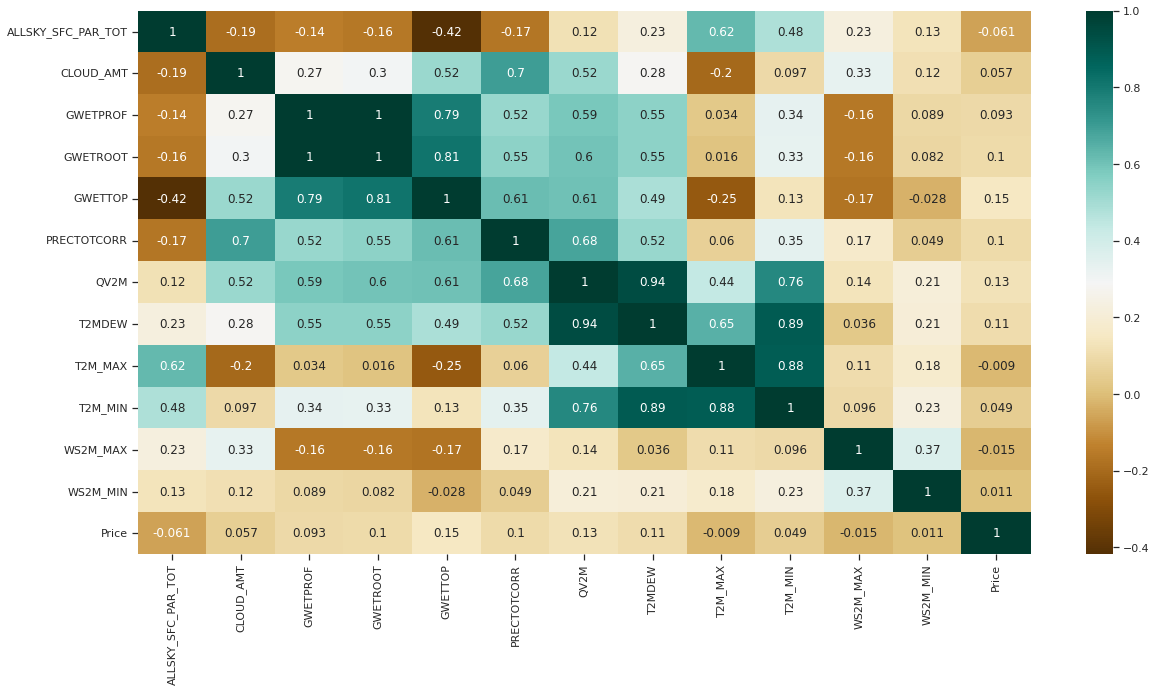

In [650]:
# Viewing co-relation among the columns in the dataframe 
plt.figure(figsize=(20,10))
c= df_final.drop(columns=["Month","State","Crop","Year"]).corr()
sns.heatmap(c,cmap="BrBG",annot=True)

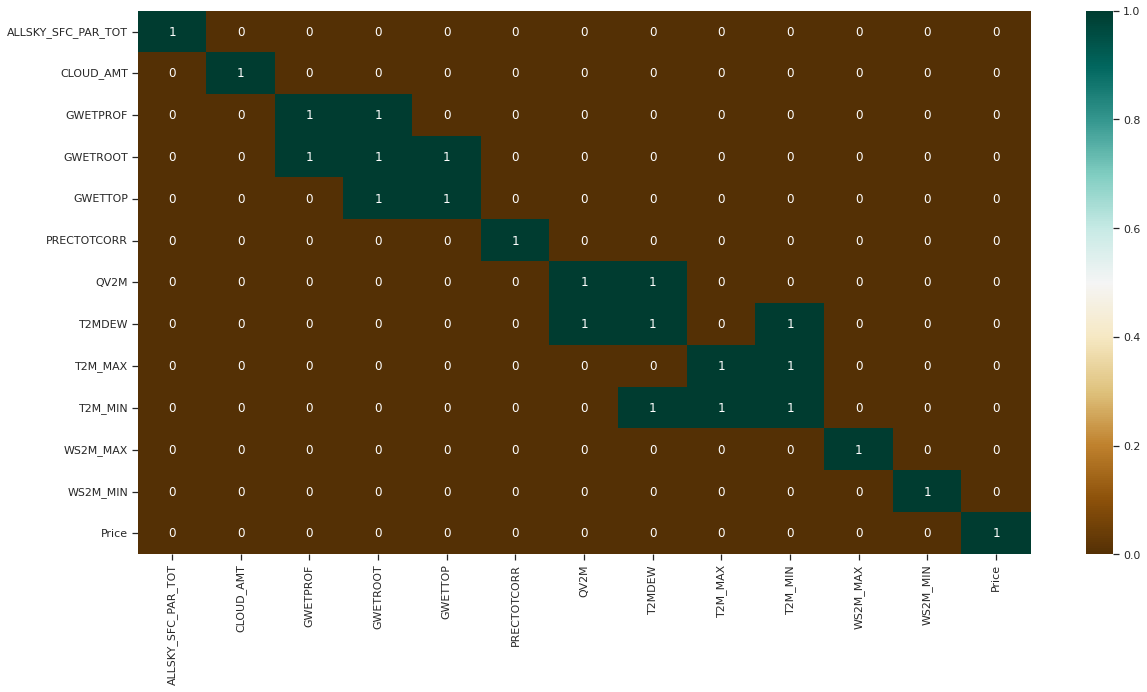

In [651]:
# Checking for columns which are highly co-related 
plt.figure(figsize=(20,10))
c= df_final.drop(columns=["Month","State","Crop","Year"]).corr()>.8 
sns.heatmap(c,cmap="BrBG",annot=True)

## Plotting pair plots 

In [653]:
# Plotting pair plots of different crops 
#sns.set_theme(style="ticks")
#sns.pairplot(df_final.drop(columns=["Month","State","Year"]), hue="Crop")

## Removing outliers from each  column if any

In [654]:
df_final["Year"] = df_final["Year"].astype(int).astype(str) # Changing values of Year column from int to string type

In [657]:
df_final.shape # No:of rows and columns in our dataframe 

(28764, 17)

In [658]:
df_final 

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State,Crop,Price
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,1031.500000
1,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,1908.000000
2,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.20,Andhra Pradesh,BRINJAL LONG,1400.000000
3,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.20,Andhra Pradesh,CAULIFLOWER,675.000000
4,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.20,Andhra Pradesh,CAULIFLOWER,1664.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28759,2020,December,58.88,20.76,0.60,0.61,0.64,0.00,9.09,12.46,26.4,6.30,3.31,0.07,West Bengal,CAULIFLOWER,2956.333333
28760,2020,December,58.88,20.76,0.60,0.61,0.64,0.00,9.09,12.46,26.4,6.30,3.31,0.07,West Bengal,CHILLY,2354.333333
28761,2020,December,58.88,20.76,0.60,0.61,0.64,0.00,9.09,12.46,26.4,6.30,3.31,0.07,West Bengal,OKRA,2238.333333
28762,2020,December,58.88,20.76,0.60,0.61,0.64,0.00,9.09,12.46,26.4,6.30,3.31,0.07,West Bengal,ONION,4011.666667


In [659]:
int_columns = df_final.select_dtypes([np.number]).columns # Taking only int type column hader names into a list 
#Reference: https://stackoverflow.com/questions/51684585/how-to-get-numeric-column-names-in-pandas-dataframe 

In [660]:
int_columns # Columns with type as int 

Index(['ALLSKY_SFC_PAR_TOT', 'CLOUD_AMT', 'GWETPROF', 'GWETROOT', 'GWETTOP',
       'PRECTOTCORR', 'QV2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'WS2M_MAX',
       'WS2M_MIN', 'Price'],
      dtype='object')

In [661]:
x = int_columns.tolist()

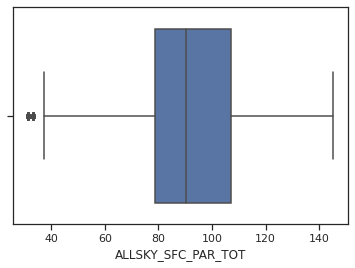

In [662]:
sns.boxplot(x=df_final[int_columns[0]]) # Box plot of "ALLSKY_SFC_PAR_TOT" column

In [ ]:
#Conclusion : No significient outliers 

In [663]:
df_final.shape

(28764, 17)

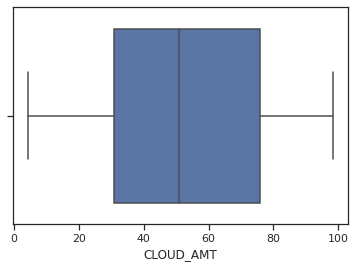

In [664]:
sns.boxplot(x=df_final[int_columns[1]]) # Box plot of "CLOUD_AMT" column

In [ ]:
#Conclusion : No significient outliers 

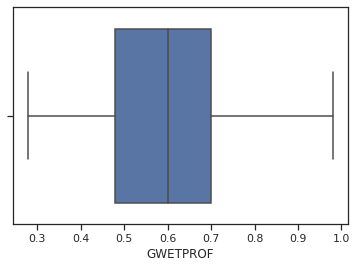

In [665]:
sns.boxplot(x=df_final[int_columns[2]]) # Box plot of "GWETPROF" column 

In [ ]:
#Conclusion : No significient outliers 

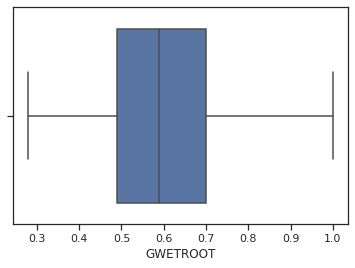

In [666]:
sns.boxplot(x=df_final[int_columns[3]]) # Box plot of "GWETROOT" column

In [ ]:
#Conclusion : No significient outliers 

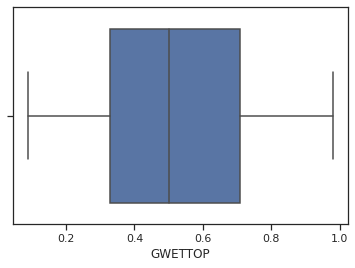

In [667]:
sns.boxplot(x=df_final[int_columns[4]])

In [ ]:
#Conclusion : No significient outliers 

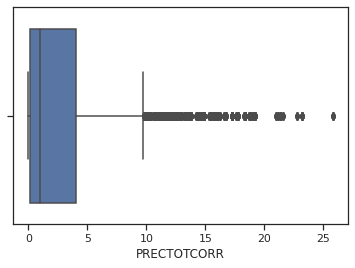

In [668]:
sns.boxplot(x=df_final[int_columns[5]]) # Box plot of "PRECGTOTCORR" column

In [669]:
# Defining inter quartile range based on box plot 
Q1 = df_final[int_columns[5]].quantile(0.20)
Q3 = df_final[int_columns[5]].quantile(0.85)
IQR = Q3-Q1


In [670]:
df_final.shape # New dataframe shape

(28764, 17)

In [671]:
# Removing the outliers based on interquartile range
df_final1 = df_final[~((df_final[int_columns[5]] > (Q3+1.5 * IQR)))]
df_final1.shape # New dataframe shape

(28469, 17)

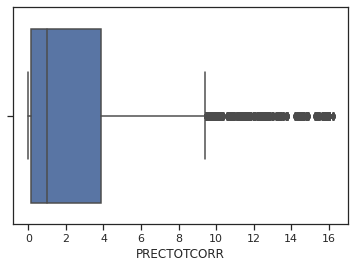

In [672]:
sns.boxplot(x=df_final1[int_columns[5]])  # Box plot of "PRECGTOTCORR" column

In [673]:
df_final[int_columns[5]].describe() # Viewing statistical details 

count    28764.000000
mean         2.744346
std          3.835773
min          0.000000
25%          0.150000
50%          1.010000
75%          4.000000
max         25.790000
Name: PRECTOTCORR, dtype: float64

In [674]:
# Defining inter quartile range based on box plot 
Q1 = df_final1[int_columns[5]].quantile(0.02)
Q3 = df_final1[int_columns[5]].quantile(0.75)
IQR = Q3-Q1

In [675]:
Q3+1.5 * IQR

9.65

In [676]:
# Removing the outliers based on interquartile range
df_final1 = df_final1[~((df_final1[int_columns[5]] > (Q3+1.5 * IQR)))]
df_final1.shape # New dataframe shape

(26869, 17)

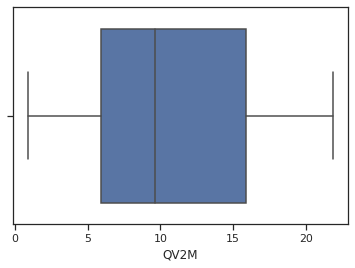

In [677]:
sns.boxplot(x=df_final1[int_columns[6]]) # Box plot of "QV2M" column

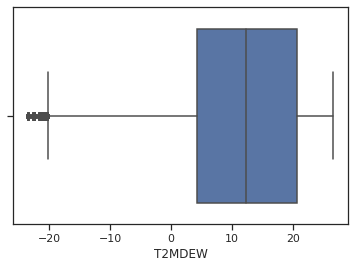

In [678]:
sns.boxplot(x=df_final1[int_columns[7]]) # Box plot of "T2mDEW" column

In [679]:
df_final1[int_columns[7]].describe() # Viewing statistical details 

count    26869.000000
mean        10.772269
std         11.067327
min        -23.370000
25%          4.230000
50%         12.190000
75%         20.540000
max         26.480000
Name: T2MDEW, dtype: float64

In [680]:
# Defining inter quartile range based on box plot 
Q1 = df_final1[int_columns[7]].quantile(0.25)
Q3 = df_final1[int_columns[7]].quantile(0.75)
IQR = Q3-Q1
IQR

16.31

In [681]:
Q1 -1.5 * IQR

-20.234999999999996

In [682]:
# Removing the outliers based on interquartile range
df_final1 = df_final1[~((df_final1[int_columns[7]] < (Q1 -1.5 * IQR)))]
df_final1.shape # New dataframe shape

(26527, 17)

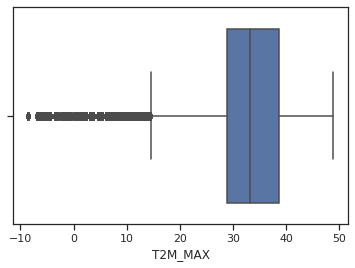

In [683]:
sns.boxplot(x=df_final[int_columns[8]]) # Box plot of "T2M_MAX" column

In [684]:
df_final1[int_columns[8]].describe()# Viewing statistical details 

count    26527.000000
mean        32.138828
std         10.301899
min         -6.190000
25%         28.980000
50%         33.340000
75%         39.080000
max         48.770000
Name: T2M_MAX, dtype: float64

In [685]:
# Defining inter quartile range based on box plot 
Q1 = df_final1[int_columns[8]].quantile(0.20)
Q3 = df_final1[int_columns[8]].quantile(0.70)
IQR = Q3-Q1
IQR

10.219999999999999

In [686]:
Q1 -1.5 * IQR

12.14

In [687]:
# Removing the outliers based on interquartile range
df_final1 = df_final1[~((df_final1[int_columns[8]] < (Q1 -1.5 * IQR)))]
df_final1.shape # New dataframe shape

(24886, 17)

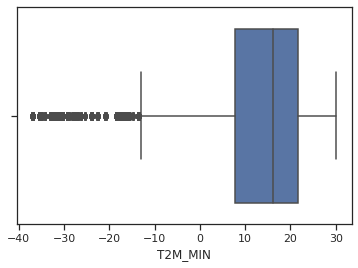

In [688]:
sns.boxplot(x=df_final[int_columns[9]]) # Box plot of "T2M_MIN" column

In [689]:
df_final1[int_columns[9]].describe() # Viewing statistical details 

count    24886.000000
mean        14.860918
std          8.250598
min        -15.430000
25%          8.830000
50%         16.320000
75%         21.530000
max         30.160000
Name: T2M_MIN, dtype: float64

In [690]:
# Defining inter quartile range based on box plot 
Q1 = df_final1[int_columns[9]].quantile(0.25)
Q3 = df_final1[int_columns[9]].quantile(0.75)
IQR = Q3-Q1


In [691]:
Q1 -1.5 * IQR

-10.22

In [692]:
# Removing the outliers based on interquartile range
df_final1 = df_final1[~((df_final1[int_columns[9]] < (Q1 -1.5 * IQR)))]
df_final1.shape # New dataframe shape

(24821, 17)

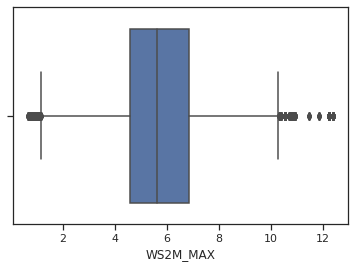

In [693]:
sns.boxplot(x=df_final[int_columns[10]]) # Box plot of "WS2M_MAX" column

In [694]:
df_final1[int_columns[10]].describe() # Viewing statistical details 

count    24821.000000
mean         5.623559
std          1.760408
min          0.680000
25%          4.460000
50%          5.520000
75%          6.660000
max         12.240000
Name: WS2M_MAX, dtype: float64

In [695]:
# Defining inter quartile range based on box plot 
Q1 = df_final1[int_columns[10]].quantile(0.25)
Q3 = df_final1[int_columns[10]].quantile(0.75)
IQR = Q3-Q1


In [696]:
Q1 -1.5 * IQR

1.1599999999999997

In [697]:
Q3 + 1.5* IQR

9.96

In [698]:
# Removing the outliers based on interquartile range
df_final1 = df_final1[~((df_final1[int_columns[10]] < (Q1 -1.5 * IQR)) | (df_final1[int_columns[10]] > (Q3  + 1.5 * IQR)) )]
df_final1.shape # New dataframe shape

(24322, 17)

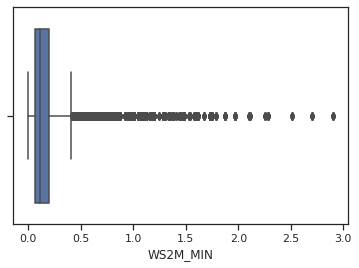

In [699]:
sns.boxplot(x=df_final[int_columns[11]]) # Box plot of "WS2M_MIN" column

In [700]:
df_final1[int_columns[11]].describe() # Viewing statistical details 

count    24322.000000
mean         0.192720
std          0.268166
min          0.000000
25%          0.060000
50%          0.110000
75%          0.200000
max          2.280000
Name: WS2M_MIN, dtype: float64

In [701]:
# Defining inter quartile range based on box plot 
Q1 = df_final1[int_columns[11]].quantile(0.20)
Q3 = df_final1[int_columns[11]].quantile(0.85)
IQR = Q3-Q1


In [702]:
Q3 + 1.5 * IQR

0.6462499999999636

In [703]:
df_final1 = df_final1[~( (df_final1[int_columns[11]] > (Q3  + 1.5 * IQR)) )]
df_final1.shape# New dataframe shape

(22813, 17)

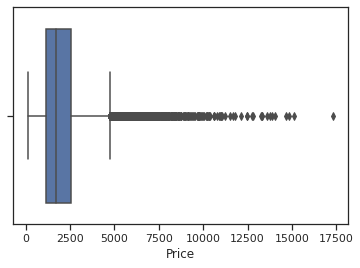

In [704]:
sns.boxplot(x=df_final[int_columns[12]]) # Box plot of "Price" column

In [705]:
df_final1[int_columns[12]].describe() # Viewing statistical details 

count    22813.000000
mean      2026.642779
std       1322.680538
min        163.000000
25%       1124.428571
50%       1711.000000
75%       2565.000000
max      17300.000000
Name: Price, dtype: float64

In [706]:
# Defining inter quartile range based on box plot 
Q1 = df_final1[int_columns[12]].quantile(0.20)
Q3 = df_final1[int_columns[12]].quantile(0.85)
IQR = Q3-Q1


In [707]:
Q3 + 1.5 * IQR

6395.0

In [708]:
# Removing the outliers based on interquartile range
df_final1 = df_final1[~( (df_final1[int_columns[12]] > (Q3  + 1.5 * IQR)) )]
df_final1.shape

(22546, 17)

In [709]:
df_final.shape # Original dataframe shape

(28764, 17)

In [710]:
df_final1.shape # New dataframe shape

(22546, 17)

In [712]:
df_final1.describe() # Viewing statistical details of new dataframe

,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Price
count,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000,22546.000000
mean,94.833732,47.552617,0.588626,0.590678,0.492361,1.972570,10.892910,12.263916,33.857018,14.425444,5.518628,0.134697,1953.962900
std,19.949101,23.200892,0.148017,0.151835,0.227999,2.526729,5.080218,8.544325,7.589057,8.210645,1.558073,0.113362,1130.905947
min,37.190000,4.380000,0.280000,0.280000,0.090000,0.000000,2.320000,-13.270000,12.200000,-9.600000,1.180000,0.000000,163.000000
25%,82.050000,28.190000,0.490000,0.500000,0.300000,0.100000,6.470000,5.620000,29.940000,8.410000,4.450000,0.060000,1118.000000
50%,93.520000,43.200000,0.600000,0.590000,0.480000,0.770000,9.770000,12.380000,33.780000,15.420000,5.420000,0.100000,1697.750000
75%,109.380000,66.920000,0.670000,0.670000,0.670000,3.070000,15.750000,20.440000,39.580000,21.190000,6.450000,0.170000,2524.000000
max,141.410000,95.810000,0.960000,0.980000,0.950000,9.650000,21.850000,26.480000,48.770000,30.160000,9.900000,0.640000,6393.777778


In [713]:
df_final1.info()  # Using info functon to print concise of new final dataframe 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22546 entries, 0 to 28763
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                22546 non-null  object 
 1   Month               22546 non-null  object 
 2   ALLSKY_SFC_PAR_TOT  22546 non-null  float64
 3   CLOUD_AMT           22546 non-null  float64
 4   GWETPROF            22546 non-null  float64
 5   GWETROOT            22546 non-null  float64
 6   GWETTOP             22546 non-null  float64
 7   PRECTOTCORR         22546 non-null  float64
 8   QV2M                22546 non-null  float64
 9   T2MDEW              22546 non-null  float64
 10  T2M_MAX             22546 non-null  float64
 11  T2M_MIN             22546 non-null  float64
 12  WS2M_MAX            22546 non-null  float64
 13  WS2M_MIN            22546 non-null  float64
 14  State               22546 non-null  object 
 15  Crop                22546 non-null  object 
 16  Pric

In [715]:
df_final1.head(20) # Top 20 rows of final dataset

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State,Crop,Price
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,1031.500000
1,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,1908.000000
2,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BRINJAL LONG,1400.000000
3,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CAULIFLOWER,675.000000
4,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CAULIFLOWER,1664.000000
5,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CHILLY,1985.000000
6,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CHILLY,1134.000000
7,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,OKRA,1212.333333
8,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,OKRA,3392.000000
9,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,ONION,3346.000000


In [716]:
df_final1.isnull().sum() # Checking for null values 

Year                  0
Month                 0
ALLSKY_SFC_PAR_TOT    0
CLOUD_AMT             0
GWETPROF              0
GWETROOT              0
GWETTOP               0
PRECTOTCORR           0
QV2M                  0
T2MDEW                0
T2M_MAX               0
T2M_MIN               0
WS2M_MAX              0
WS2M_MIN              0
State                 0
Crop                  0
Price                 0
dtype: int64

In [714]:
df_final1.to_excel(r'/content/drive/MyDrive/Capstone/Datasets/Final_Datasets/Final_Dataset.xlsx', index = False) # Downloading final cleansed and merged dataset as final_Dataset in excel format.